<a href="https://colab.research.google.com/github/Hevensh/HvsPredictor/blob/main/predictable_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test the predictability of Hevensh's New Loss Function

In [1]:
!git clone https://github.com/Hevensh/HvsPredictor.git

Cloning into 'HvsPredictor'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 93 (delta 47), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (93/93), done.


In [2]:
import numpy as np
import IPython.display
import matplotlib.pyplot as plt
from HvsPredictor import MyPredictor as hvs

In [3]:
t = np.arange(0,5,0.01)

In [4]:
np.random.seed(0)
x = np.sin(t*np.pi*10) + 0.3*np.random.random([500,])

In [5]:
md1 = hvs.MyPredictor(x)
md1.deTrend()
md1.Options_set()
md1.compile_and_fit()
IPython.display.clear_output()

In [6]:
md2 = hvs.MyPredictor(x)
md2.deTrend()
md2.Options_set(loss_func='mse')
md2.compile_and_fit()
IPython.display.clear_output()

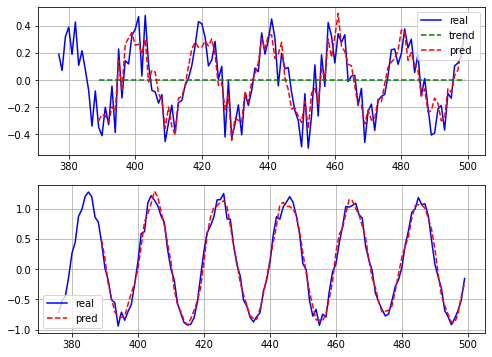

In [7]:
md1.result_plot()

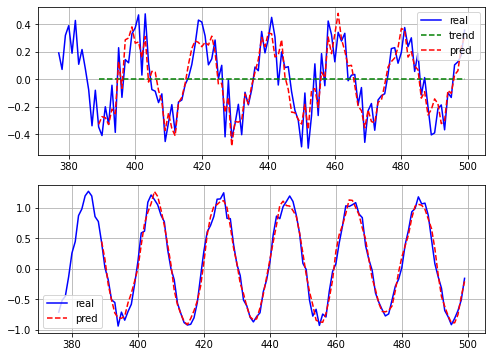

In [8]:
md2.result_plot()

In [9]:
md1

The model uses <HvsPredictor.MyPredictor.CautiousLoss object at 0x7f3ab39905d0>
MSE on test set is 0.013736838086235287

In [10]:
md2

The model uses mse
MSE on test set is 0.0136063760224255